In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import seaborn as sns
from welly import Project, Well
import lasio

In [2]:
import os

project_root = os.getcwd()
raw_data_dir = os.path.join(project_root, "raw_data")
export_dir = os.path.join(project_root, "export")
print(os.path.exists(export_dir))
print(os.path.exists(raw_data_dir))

True
True


# Logging While Drilling F-14
[Depth indexed data](#id1)


[17 1/2" LWD Section](#id11)
[12 1/4" LWD Section](#id12)
[8 1/2" LWD Section](#id13)
[Final Dataframe](#id15)



[Time indexed data](#id2) 



In [3]:
ls  *.LAS 

ls: cannot access '*.LAS': No such file or directory


In [13]:
os.listdir(raw_data_dir)

['WL_RAW_BHPR-GR-MECH_MWD_1.LAS',
 'WL_RAW_BHPR-GR-MECH_MWD_2.LAS',
 'WL_RAW_BHPR-GR-MECH_MWD_3.LAS']

<a id="id1"></a>
# Depth indexed data
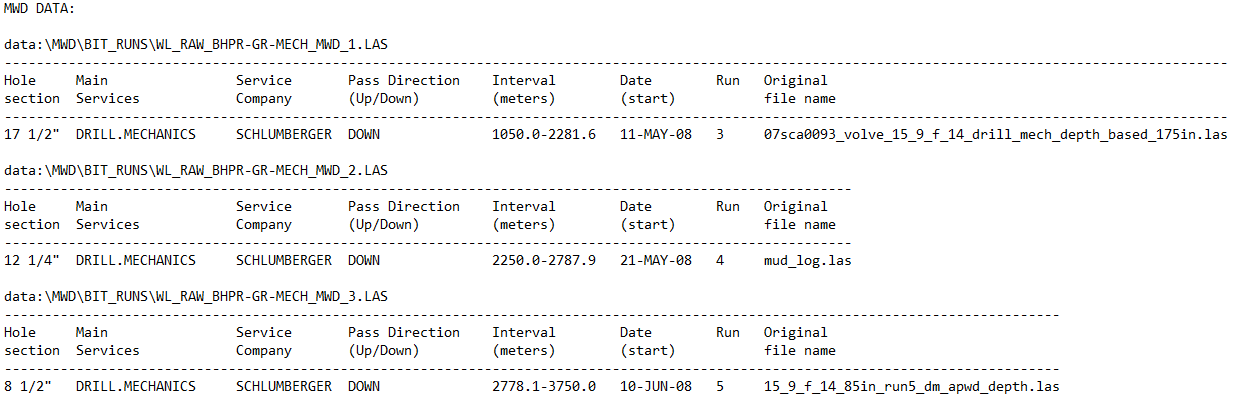

In [14]:
Project.from_las("raw_data/WL_RAW_BHPR-GR-MECH_MWD_1.LAS")

0it [00:00, ?it/s]/home/vagrant/.pyenv/versions/anaconda3-2020.07/lib/python3.8/site-packages/welly/well.py:192: FutureWarning: From v0.5 the default will be 'original', keeping whatever is used in the LAS file. If you want to force conversion to metres, change your code to use `index='m'`.
  warnings.warn(m, FutureWarning)
1it [00:00,  2.20it/s]


Index,UWI,Data,Curves
0,,18 curves,"ROP5, ARC_GR_UNC_RT, SWOB, TQA, RPM, STICK_RT, CRPM_RT, TFLO, TRPM_RT, SPPA, SHKRSK_RT, SHK2_RT, SHK_ISONIC_RT, PDSHKRSK, SHKPK_RT, ECD_ARC, APRS_ARC, ATMP"


In [15]:
Project.from_las("raw_data/WL_RAW_BHPR-GR-MECH_MWD_2.LAS")

1it [00:00,  4.70it/s]


Index,UWI,Data,Curves
0,,18 curves,"ROP5, ARC_GR_RT, SWOB, TQA, STICK_RT, SPPA, TRPM_RT, TFLO, RPM, CRPM_RT, SHKRSK_RT, SHK2_RT, ECD_ARC, APRS_ARC, ATMP, SPM1, SPM2, SPM3"


In [16]:
Project.from_las("raw_data/WL_RAW_BHPR-GR-MECH_MWD_3.LAS")

1it [00:00,  2.82it/s]


Index,UWI,Data,Curves
0,,18 curves,"ROP5, GRMA_ECO_RT, STICK_RT, SWOB, SHKRSK_RT, SHKPK_RT, RPM, TRPM_RT, CRPM_RT, TFLO, DHAT, DHAP, TQA, ECD, SPPA, SPM1, SPM2, SPM3"


In [17]:
f1 = Project.from_las("raw_data/WL_RAW_BHPR-GR-MECH_MWD_1.LAS")
f2 = Project.from_las("raw_data/WL_RAW_BHPR-GR-MECH_MWD_2.LAS")
f3 = Project.from_las("raw_data/WL_RAW_BHPR-GR-MECH_MWD_3.LAS")

1it [00:00,  2.23it/s]
1it [00:00,  4.82it/s]
1it [00:00,  2.93it/s]


In [18]:
print('17 1/2" Section:') ; f1

17 1/2" Section:


Index,UWI,Data,Curves
0,,18 curves,"ROP5, ARC_GR_UNC_RT, SWOB, TQA, RPM, STICK_RT, CRPM_RT, TFLO, TRPM_RT, SPPA, SHKRSK_RT, SHK2_RT, SHK_ISONIC_RT, PDSHKRSK, SHKPK_RT, ECD_ARC, APRS_ARC, ATMP"


In [19]:
print('12 1/4" Section:') ; f2

12 1/4" Section:


Index,UWI,Data,Curves
0,,18 curves,"ROP5, ARC_GR_RT, SWOB, TQA, STICK_RT, SPPA, TRPM_RT, TFLO, RPM, CRPM_RT, SHKRSK_RT, SHK2_RT, ECD_ARC, APRS_ARC, ATMP, SPM1, SPM2, SPM3"


In [20]:
print('8 1/2" Section:') ; f3

8 1/2" Section:


Index,UWI,Data,Curves
0,,18 curves,"ROP5, GRMA_ECO_RT, STICK_RT, SWOB, SHKRSK_RT, SHKPK_RT, RPM, TRPM_RT, CRPM_RT, TFLO, DHAT, DHAP, TQA, ECD, SPPA, SPM1, SPM2, SPM3"


## DataFrame construction & Exploratory Data Analysis
> sec_1 = 17 1/2" Section <br>
> sec_2 = 12 1/4" Section<br>
> sec_3 = 8 1/2" Section

In [21]:
sec_1 = f1.df()
sec_2 = f2.df()
sec_3 = f3.df()

In [22]:
print("Common columns between 17.5LWD and 12.25LWD:\t")
np.intersect1d(sec_1.columns, sec_2.columns)

Common columns between 17.5LWD and 12.25LWD:	


array(['APRS_ARC', 'ATMP', 'CRPM_RT', 'ECD_ARC', 'ROP5', 'RPM', 'SHK2_RT',
       'SHKRSK_RT', 'SPPA', 'STICK_RT', 'SWOB', 'TFLO', 'TQA', 'TRPM_RT'],
      dtype=object)

In [23]:
print("Common columns between 12.25LWD and 8.5LWD:\t")
np.intersect1d(sec_2.columns, sec_3.columns)

Common columns between 12.25LWD and 8.5LWD:	


array(['CRPM_RT', 'ROP5', 'RPM', 'SHKRSK_RT', 'SPM1', 'SPM2', 'SPM3',
       'SPPA', 'STICK_RT', 'SWOB', 'TFLO', 'TQA', 'TRPM_RT'], dtype=object)

<a id="id11"></a>
## 17 1/2" LWD Section analysis 
> Turn `MiltiIndex`data structure into `RangeIndex` structure

In [24]:
sec_1.reset_index(inplace=True)  
del sec_1["UWI"]

In [25]:
print("Depths\n\tInitial :",sec_1["Depth"].min(),"[m]\n\tFinal:",sec_1["Depth"].max(),"[m]")
print("\nTotal depth =",sec_1["Depth"].max()-sec_1["Depth"].min(),"[m]")
print("\nColumns in DataFrame (logs) :")
for col in sec_1.columns: 
    print("\t",col) 

Depths
	Initial : 1050.036 [m]
	Final: 2281.5803999995414 [m]

Total depth = 1231.5443999995414 [m]

Columns in DataFrame (logs) :
	 Depth
	 ROP5
	 ARC_GR_UNC_RT
	 SWOB
	 TQA
	 RPM
	 STICK_RT
	 CRPM_RT
	 TFLO
	 TRPM_RT
	 SPPA
	 SHKRSK_RT
	 SHK2_RT
	 SHK_ISONIC_RT
	 PDSHKRSK
	 SHKPK_RT
	 ECD_ARC
	 APRS_ARC
	 ATMP


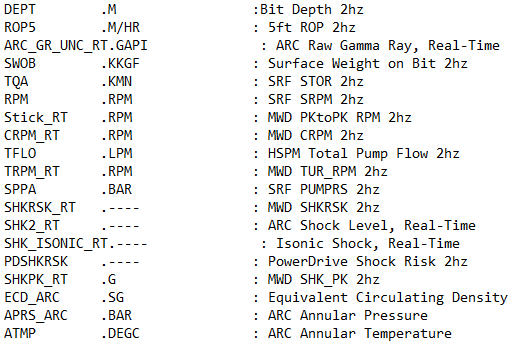

Logs:



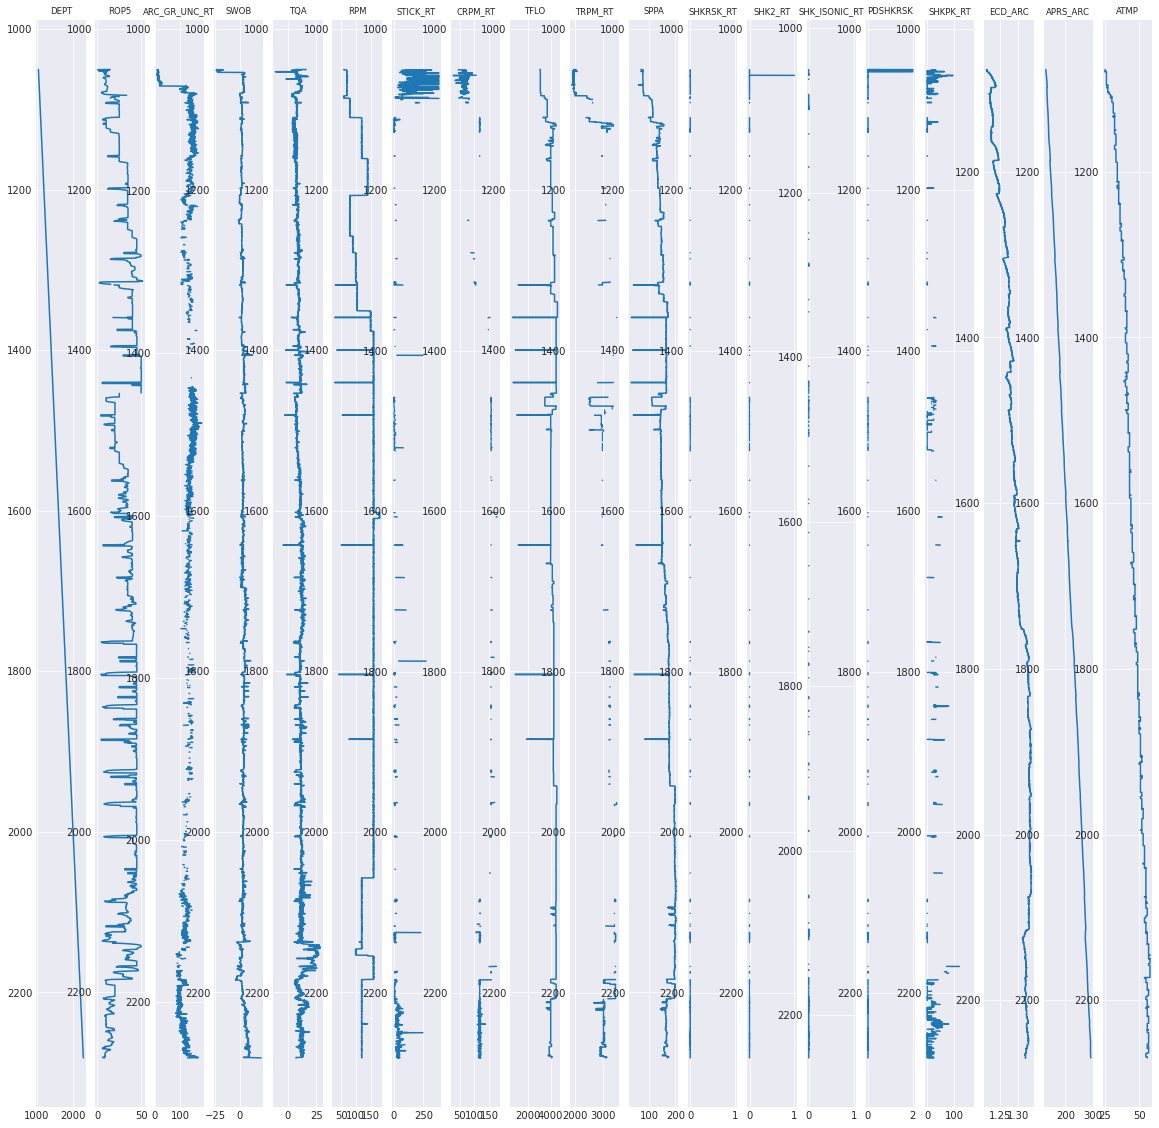

In [26]:
print("Logs:\n")
sec_1_las = r"raw_data/WL_RAW_BHPR-GR-MECH_MWD_1.LAS"
sec1_plt = lasio.read(sec_1_las)
fig,axes = plt.subplots(1,len(sec1_plt.keys()), figsize=(20,20))
for i,log in enumerate(sec1_plt.keys()):
    axes[i].plot(sec1_plt[log],sec1_plt['DEPT'])
    axes[i].invert_yaxis()
    axes[i].set_title(log,fontsize=8.5)

Missing data in the LWD data:


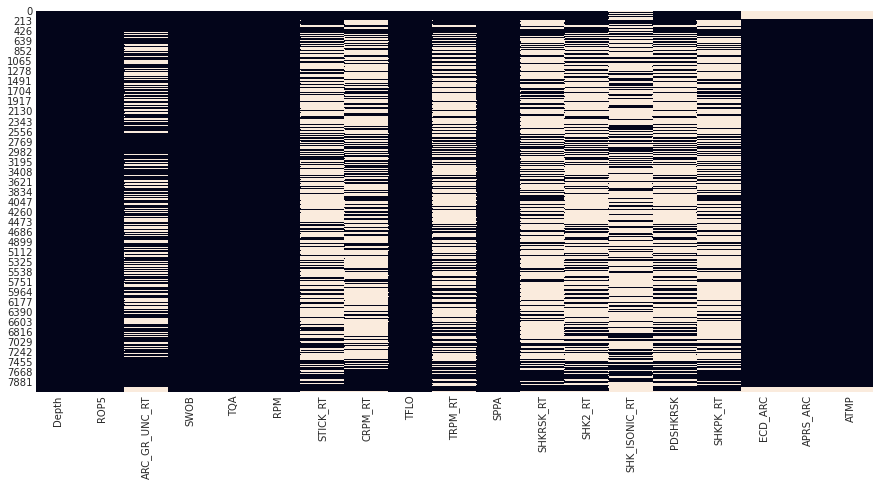

In [27]:
print("Missing data in the LWD data:")
plt.figure(figsize=(15,7))
sns.heatmap(sec_1.isnull(),cbar=False)
plt.show()

In [28]:
total = sec_1.isna().sum().sort_values(ascending = True)
percent = round(((sec_1.isna().sum()/sec_1.isna().count())*100),2).sort_values(ascending = True)
missing_data = pd.concat([total, percent], axis = 1, keys = ["Total ","Percent"])
print("Missing data:")
missing_data

Missing data:


,Total,Percent
Depth,0,0.00
SWOB,0,0.00
TQA,0,0.00
RPM,0,0.00
SPPA,0,0.00
TFLO,0,0.00
ROP5,14,0.17
ECD_ARC,255,3.16
APRS_ARC,255,3.16
ATMP,255,3.16


<a id="id12"></a>
## 12 1/4" LWD Section analysis 
> LWD Data columns from the 12 1/4" section equals data columns from 8 1/2" section


> Turn `MiltiIndex`data structure into `RangeIndex` structure

In [29]:
sec_2

ROP5  ARC_GR_RT     SWOB     TQA  STICK_RT      SPPA  \
UWI Depth                                                                
    2250.0336      NaN    91.8983   1.8952  7.6334      39.0  120.4109   
    2250.1860      NaN        NaN   2.2988  8.5433       NaN  121.8338   
    2250.3384  19.7809    99.6068   2.5225  8.2682      33.0  123.0028   
    2250.4908  19.7804    91.8983   2.5204  9.2574       NaN  123.3786   
    2250.6432  19.7728    91.8983   2.5110  9.3463       NaN  123.6700   
...                ...        ...      ...     ...       ...       ...   
    2787.2436  30.0162        NaN  12.7218  9.3756       NaN  201.2531   
    2787.3960      NaN        NaN      NaN     NaN       NaN       NaN   
    2787.5484      NaN        NaN      NaN     NaN       NaN       NaN   
    2787.7008      NaN        NaN      NaN     NaN       NaN       NaN   
    2787.8532      NaN        NaN      NaN     NaN       NaN       NaN   

                 TRPM_RT       TFLO       RPM  CRPM_RT  SHKRSK_RT  SHK2_RT  \
UWI Depth                                                                    
    2250.0336        NaN  2666.9954   29.7423     28.0        NaN      0.0   
    2250.1860  1679.6875  2666.9954   29.1071     27.0        0.0      NaN   
    2250.3384        NaN  2666.9954   29.4727      NaN        NaN      0.0   
    2250.4908  1679.6875  2666.9954   29.0000      NaN        0.0      NaN   
    2250.6432        NaN  2666.9954   29.5091      NaN        NaN      0.0   
...                  ...        ...       ...      ...        ...      ...   
    2787.2436        NaN  3227.4944  154.0000      NaN        NaN      NaN   
    2787.3960        NaN        NaN       NaN      NaN        NaN      NaN   
    2787.5484        NaN        NaN       NaN      NaN        NaN      NaN   
    2787.7008        NaN        NaN       NaN      NaN        NaN      NaN   
    2787.8532        NaN        NaN       NaN      NaN        NaN      NaN   

               ECD_ARC  APRS_ARC  ATMP  SPM1  SPM2  SPM3  
UWI Depth                                                 
    2250.0336   1.3313  293.3031  39.0  60.0   0.0  60.0  
    2250.1860   1.3312  293.3031  39.0  60.0   0.0  60.0  
    2250.3384   1.3315  293.3720  39.0  60.0   0.0  60.0  
    2250.4908   1.3314  293.3720  39.0  60.0   0.0  60.0  
    2250.6432   1.3310  293.3031  39.0  60.0   0.0  60.0  
...                ...       ...   ...   ...   ...   ...  
    2787.2436      NaN       NaN   NaN  65.0  40.0  40.0  
    2787.3960      NaN       NaN   NaN   NaN   NaN   NaN  
    2787.5484      NaN       NaN   NaN   NaN   NaN   NaN  
    2787.7008      NaN       NaN   NaN   NaN   NaN   NaN  
    2787.8532      NaN       NaN   NaN   NaN   NaN   NaN  

[3530 rows x 18 columns]

In [30]:
sec_2.reset_index(inplace=True)  
del sec_2["UWI"]

In [31]:
print("Depths\n\tInitial :",sec_2["Depth"].min(),"[m]\n\tFinal:",sec_2["Depth"].max(),"[m]")
print("\nTotal depth =",sec_2["Depth"].max()-sec_2["Depth"].min(),"[m]")
print("\nColumns in DataFrame (logs) :")
for col in sec_2.columns: 
    print("\t",col) 

Depths
	Initial : 2250.0336 [m]
	Final: 2787.8531999998 [m]

Total depth = 537.8195999997997 [m]

Columns in DataFrame (logs) :
	 Depth
	 ROP5
	 ARC_GR_RT
	 SWOB
	 TQA
	 STICK_RT
	 SPPA
	 TRPM_RT
	 TFLO
	 RPM
	 CRPM_RT
	 SHKRSK_RT
	 SHK2_RT
	 ECD_ARC
	 APRS_ARC
	 ATMP
	 SPM1
	 SPM2
	 SPM3


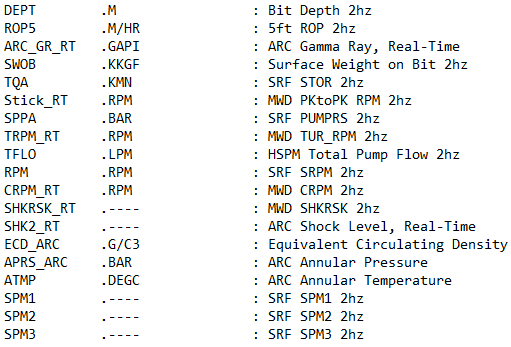

Logs:



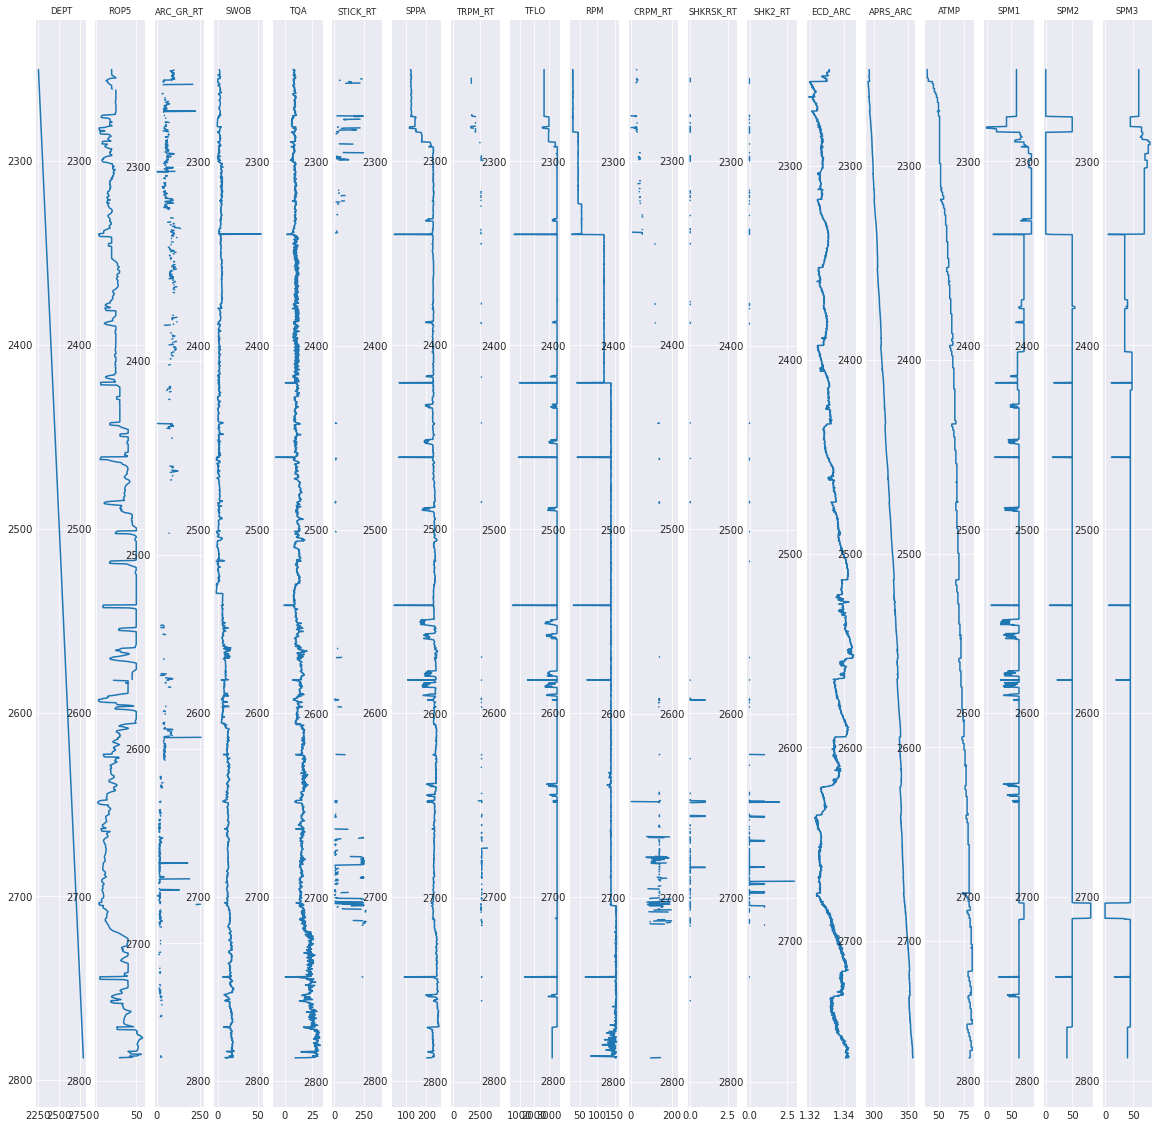

In [32]:
print("Logs:\n")
sec_2_las = os.path.join(raw_data_dir, "WL_RAW_BHPR-GR-MECH_MWD_2.LAS")
sec2_plt = lasio.read(sec_2_las)
fig,axes = plt.subplots(1,len(sec2_plt.keys()), figsize=(20,20))
for i,log in enumerate(sec2_plt.keys()):
    axes[i].plot(sec2_plt[log],sec2_plt['DEPT'])
    axes[i].invert_yaxis()
    axes[i].set_title(log,fontsize=8.5)

Missing data in the LWD data:


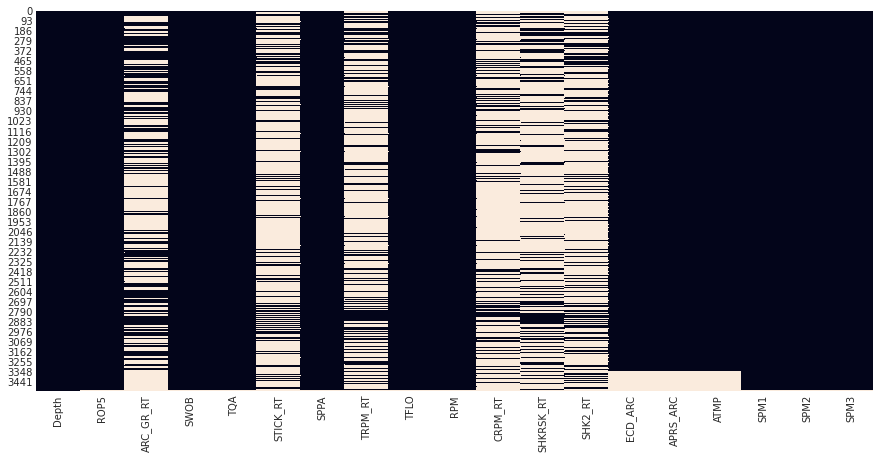

In [33]:
print("Missing data in the LWD data:")
plt.figure(figsize=(15,7))
sns.heatmap(sec_2.isnull(),cbar=False)
plt.show()

In [34]:
total = 0 ; percent = 0
total = sec_2.isna().sum().sort_values(ascending = True)
percent = round(((sec_2.isna().sum()/sec_2.isna().count())*100),2).sort_values(ascending = True)
missing_data = pd.concat([total, percent], axis = 1, keys = ["Total ","Percent"])
print("Missing data:")
missing_data

Missing data:


,Total,Percent
Depth,0,0.00
SPM1,4,0.11
SPM2,4,0.11
TFLO,4,0.11
SPPA,4,0.11
RPM,4,0.11
TQA,4,0.11
SWOB,4,0.11
SPM3,4,0.11
ROP5,10,0.28


<a id="id13"></a>
## 8 1/2" LWD Section analysis 
> Turn `MiltiIndex`data structure into `RangeIndex` structure

In [35]:
sec_3.reset_index(inplace=True)  
del sec_3["UWI"]

In [36]:
print("Depths\n\tInitial :",sec_3["Depth"].min(),"[m]\n\tFinal:",sec_3["Depth"].max(),"[m]")
print("\nTotal depth =",sec_3["Depth"].max()-sec_3["Depth"].min(),"[m]")
print("\nColumns in DataFrame (logs) :")
for col in sec_3.columns: 
    print("\t",col) 

Depths
	Initial : 2778.0996 [m]
	Final: 3749.954399999638 [m]

Total depth = 971.8547999996381 [m]

Columns in DataFrame (logs) :
	 Depth
	 ROP5
	 GRMA_ECO_RT
	 STICK_RT
	 SWOB
	 SHKRSK_RT
	 SHKPK_RT
	 RPM
	 TRPM_RT
	 CRPM_RT
	 TFLO
	 DHAT
	 DHAP
	 TQA
	 ECD
	 SPPA
	 SPM1
	 SPM2
	 SPM3


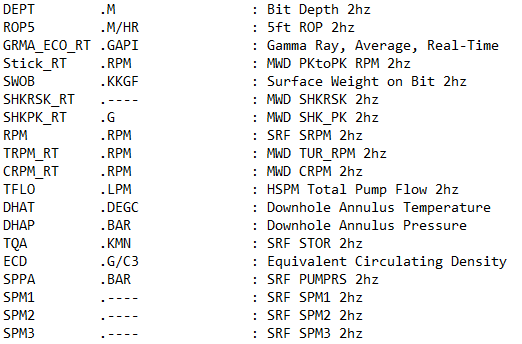

Logs:



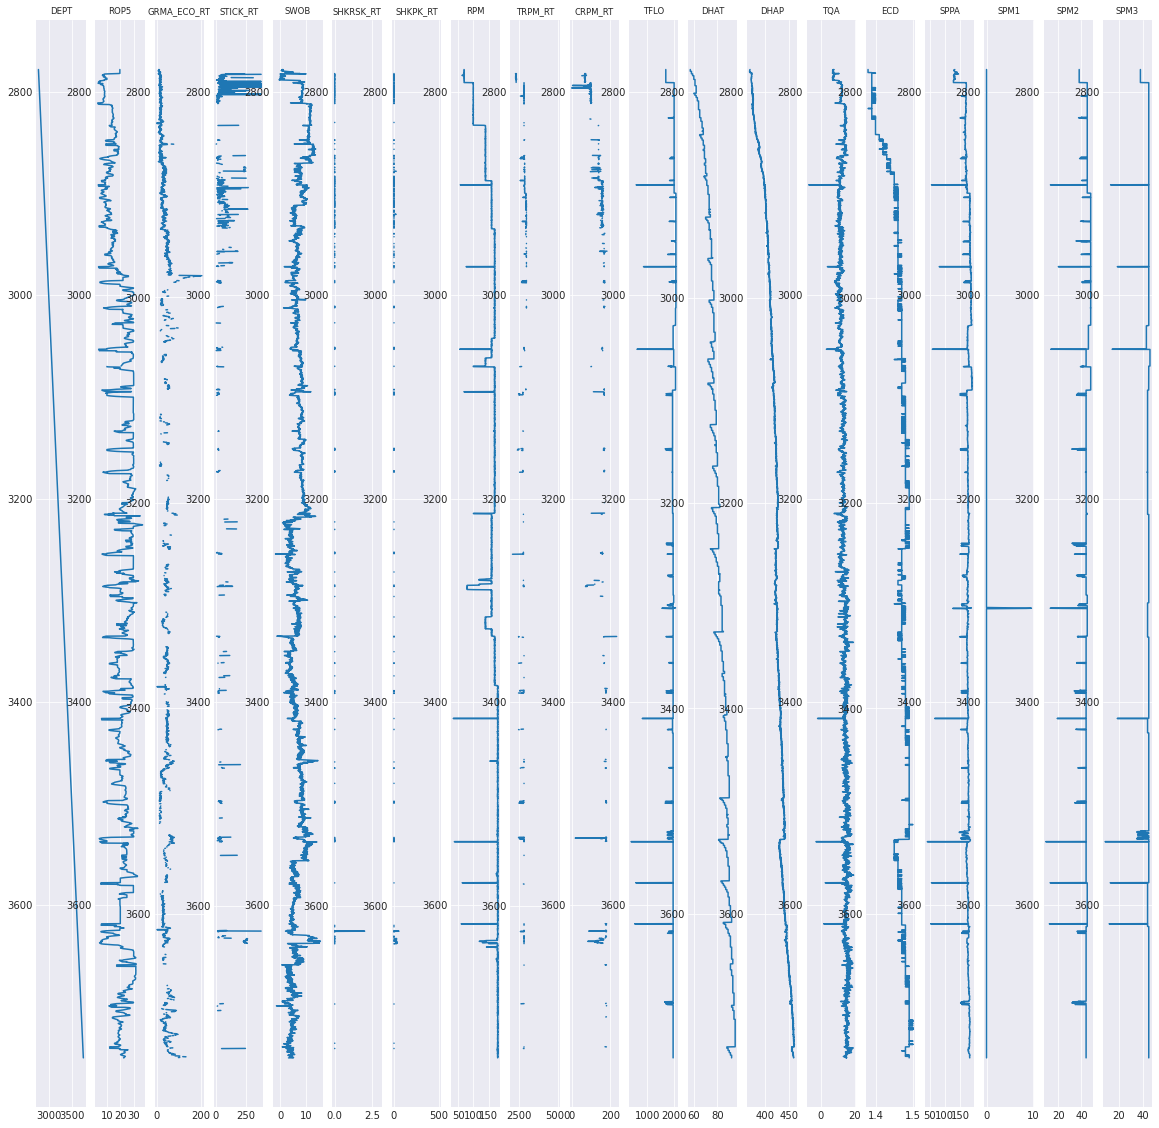

In [38]:
print("Logs:\n")
# sec_3_las = r"WL_RAW_BHPR-GR-MECH_MWD_3.LAS"
sec_3_las = os.path.join(raw_data_dir, "WL_RAW_BHPR-GR-MECH_MWD_3.LAS")
sec3_plt = lasio.read(sec_3_las)
fig,axes = plt.subplots(1,len(sec3_plt.keys()), figsize=(20,20))
for i,log in enumerate(sec3_plt.keys()):
    axes[i].plot(sec3_plt[log],sec3_plt['DEPT'])
    axes[i].invert_yaxis()
    axes[i].set_title(log,fontsize=8.5)

Missing data in the LWD data:


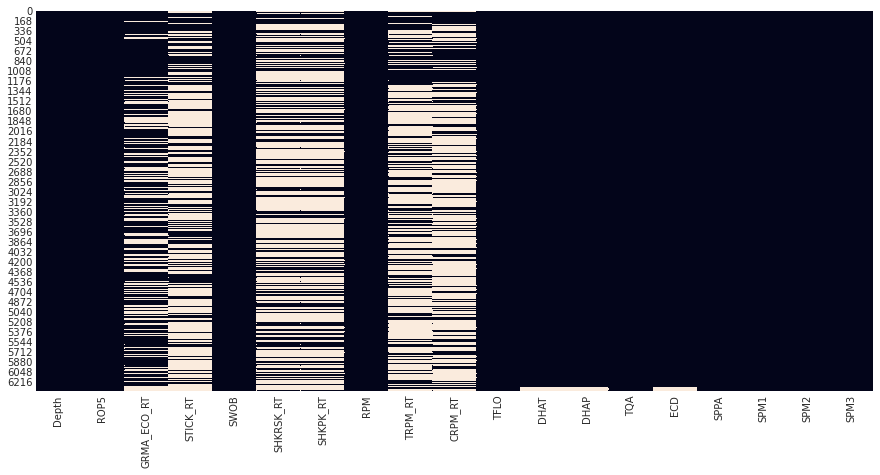

In [39]:
print("Missing data in the LWD data:")
plt.figure(figsize=(15,7))
sns.heatmap(sec_3.isnull(),cbar=False)
plt.show()

In [40]:
del missing_data ; total = 0 ; percent = 0
total = sec_3.isna().sum().sort_values(ascending = True)
percent = round(((sec_3.isna().sum()/sec_3.isna().count())*100),2).sort_values(ascending = True)
missing_data = pd.concat([total, percent], axis = 1, keys = ["Total ","Percent"])
print("Missing data:")
missing_data

Missing data:


,Total,Percent
Depth,0,0.00
SPM1,0,0.00
SPPA,0,0.00
TQA,0,0.00
TFLO,0,0.00
SPM2,0,0.00
RPM,0,0.00
SPM3,0,0.00
SWOB,0,0.00
ROP5,4,0.06


<a id="id15"></a>
## Creating final DataFrame 

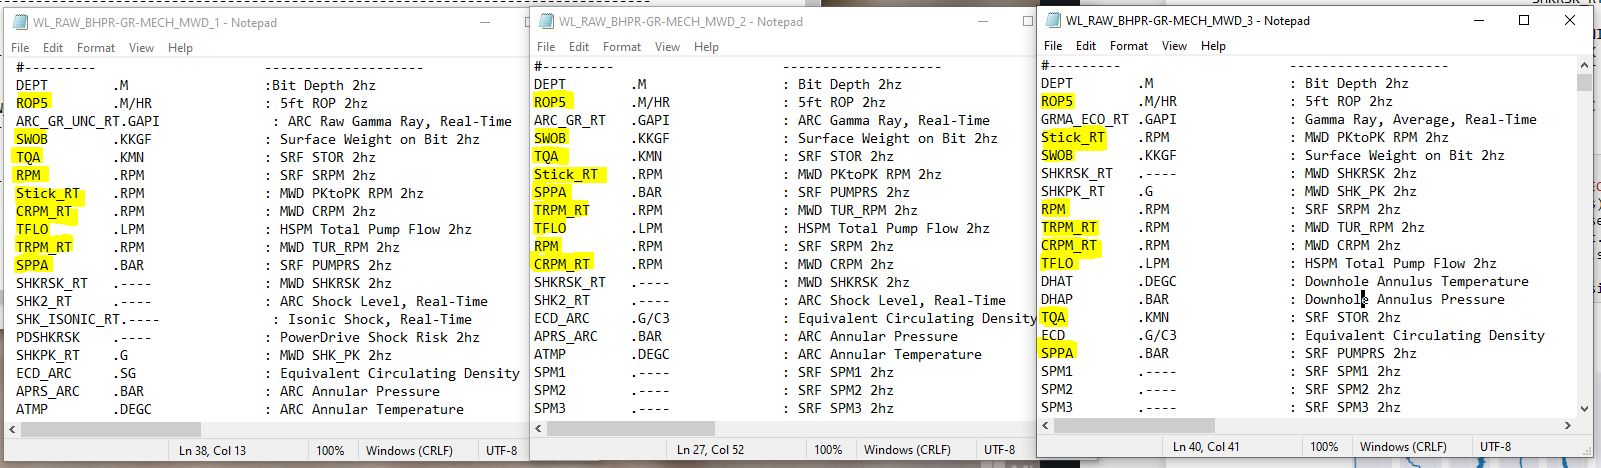

Regardless, the LWD tool in the BHA of each run:
- ArcVision Tool : Sections 17 1/2" & 12 1/4"
- EcoScope Tool : Section 8 1/2"


An stadistical description shall be done to check the possibility of concatenating values of Gamma Ray,Equivalent Density,
Annulus temperature and pressure between the tools

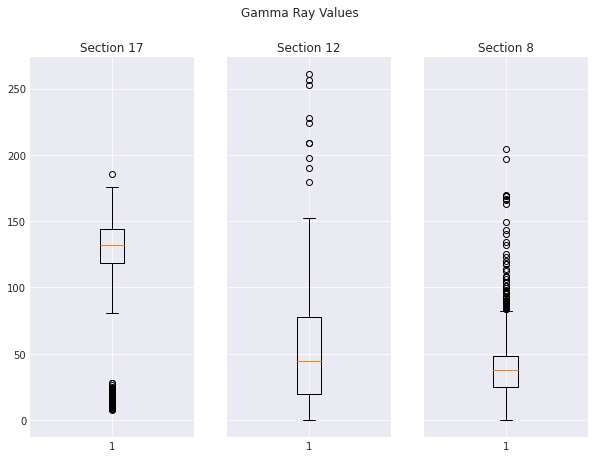

In [41]:
fig, axs = plt.subplots(1,3,figsize=(10,7),sharey = True)
fig.suptitle('Gamma Ray Values')
axs[0].boxplot(sec_1["ARC_GR_UNC_RT"].dropna())
axs[0].set_title("Section 17")
axs[1].boxplot(sec_2["ARC_GR_RT"].dropna())
axs[1].set_title("Section 12")
axs[2].boxplot(sec_3["GRMA_ECO_RT"].dropna())
axs[2].set_title("Section 8")
plt.show() 

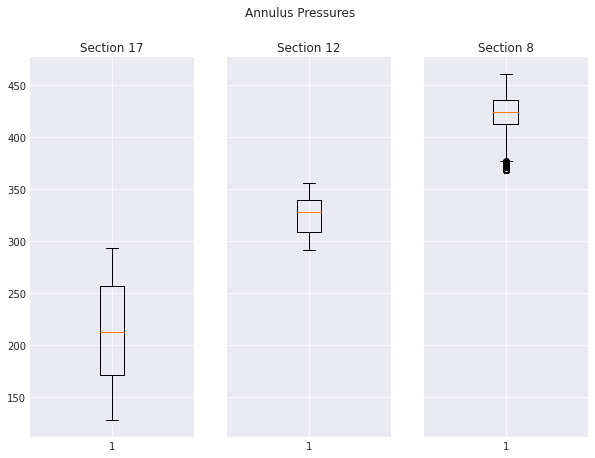

In [42]:
fig, axs = plt.subplots(1,3,figsize=(10,7),sharey = True)
fig.suptitle('Annulus Pressures')
axs[0].boxplot(sec_1["APRS_ARC"].dropna())
axs[0].set_title("Section 17")
axs[1].boxplot(sec_2["APRS_ARC"].dropna())
axs[1].set_title("Section 12")
axs[2].boxplot(sec_3["DHAP"].dropna())
axs[2].set_title("Section 8")
plt.show() 

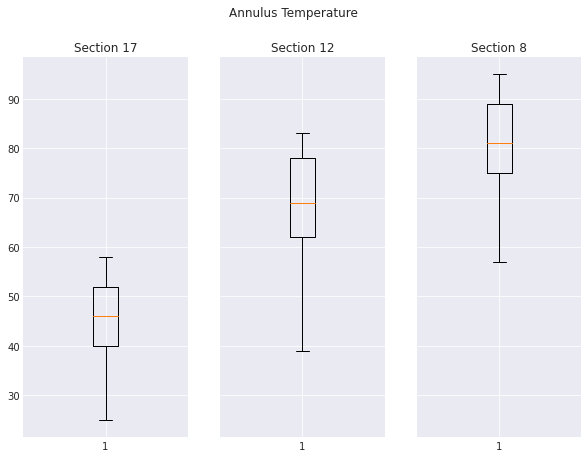

In [43]:
fig, axs = plt.subplots(1,3,figsize=(10,7),sharey = True)
fig.suptitle('Annulus Temperature')
axs[0].boxplot(sec_1["ATMP"].dropna())
axs[0].set_title("Section 17")
axs[1].boxplot(sec_2["ATMP"].dropna())
axs[1].set_title("Section 12")
axs[2].boxplot(sec_3["DHAT"].dropna())
axs[2].set_title("Section 8")
plt.show() 

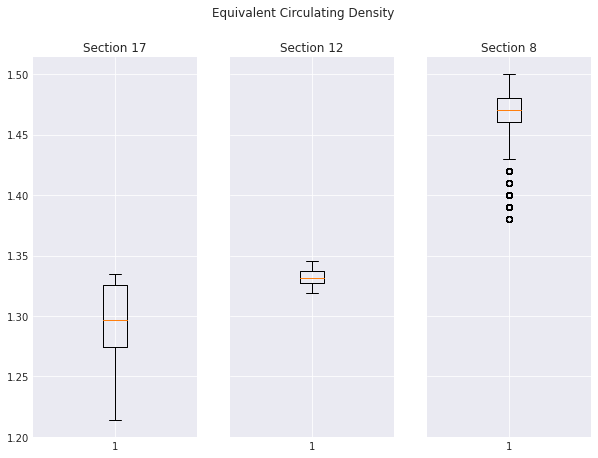

In [44]:
fig, axs = plt.subplots(1,3,figsize=(10,7),sharey = True)
fig.suptitle('Equivalent Circulating Density')
axs[0].boxplot(sec_1["ECD_ARC"].dropna())
axs[0].set_title("Section 17")
axs[1].boxplot(sec_2["ECD_ARC"].dropna())
axs[1].set_title("Section 12")
axs[2].boxplot(sec_3["ECD"].dropna())
axs[2].set_title("Section 8")
plt.show() 

The shock tools also shall be analized for a complete construction of the final dataframe from section 17 1/2" to 8 1/2", while analyzing with boxplots, the outliers wont let analizing possible, so the python builtup description tool is used 

In [45]:
print(sec_1["SHK2_RT"].describe())
print(sec_2["SHK2_RT"].describe())
print(sec_3["SHKPK_RT"].describe())

count    3226.000000
mean        0.000310
std         0.017606
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SHK2_RT, dtype: float64
count    1072.000000
mean        0.067164
std         0.307340
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: SHK2_RT, dtype: float64
count    2379.000000
mean        0.860866
std        13.007292
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       504.000000
Name: SHKPK_RT, dtype: float64


The final result for building the columns, should be as follows:

|Depth|ROP5|GammaRay|SWOB|TQA|RPM|TRPM|CRPM|Stick|SPPA|TFLO|AnTemp|AnPres|TransShock|ECD|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|


from depths : 1050 - 3749[m]

In [46]:
pre_1 = sec_1[['Depth','ROP5','ARC_GR_UNC_RT','SWOB','TQA','RPM','TRPM_RT','CRPM_RT','STICK_RT','SPPA','TFLO','ATMP','APRS_ARC','SHKRSK_RT','ECD_ARC']]
pre_2 = sec_2[['Depth','ROP5','ARC_GR_RT','SWOB','TQA','RPM','TRPM_RT','CRPM_RT','STICK_RT','SPPA','TFLO','ATMP','APRS_ARC','SHKRSK_RT','ECD_ARC']]
pre_3 = sec_3[['Depth','ROP5','GRMA_ECO_RT','SWOB','TQA','RPM','TRPM_RT','CRPM_RT','STICK_RT','SPPA','TFLO','DHAT','DHAP','SHKRSK_RT','ECD']]

In [47]:
pre_1 = pre_1.rename(columns={'ARC_GR_UNC_RT':'GammaRay','ATMP':'AnTemp','APRS_ARC':'AnPres','ECD_ARC':'ECD'})
pre_2 = pre_2.rename(columns={'ARC_GR_RT':'GammaRay','ATMP':'AnTemp','APRS_ARC':'AnPres','ECD_ARC':'ECD'})
pre_3 = pre_3.rename(columns={'GRMA_ECO_RT':'GammaRay','DHAT':'AnTemp','DHAP':'AnPres'})

In [48]:
print("Equal columns between preliminary dataframes:\n")
print(pre_1.columns == pre_2.columns)
print("\n",pre_1.columns == pre_3.columns)

Equal columns between preliminary dataframes:

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]

 [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]


In [49]:
print("Pre_1\nDepths\n\tInitial :",pre_1["Depth"].min(),"[m]\n\tFinal:",pre_1["Depth"].max(),"[m]")
print("Pre_2\nDepths\n\tInitial :",pre_2["Depth"].min(),"[m]\n\tFinal:",pre_2["Depth"].max(),"[m]")
print("Pre_3\nDepths\n\tInitial :",pre_3["Depth"].min(),"[m]\n\tFinal:",pre_3["Depth"].max(),"[m]")

Pre_1
Depths
	Initial : 1050.036 [m]
	Final: 2281.5803999995414 [m]
Pre_2
Depths
	Initial : 2250.0336 [m]
	Final: 2787.8531999998 [m]
Pre_3
Depths
	Initial : 2778.0996 [m]
	Final: 3749.954399999638 [m]


In [50]:
pre_2 = pre_2[207:]
pre_2 = pre_2.reset_index(drop=True)

In [51]:
pre_3 = pre_3[65:]
pre_3 = pre_3.reset_index(drop=True)

In [52]:
print("\tFinal depths: ")
print("Pre_1\nDepths\n\tInitial :",pre_1["Depth"].min(),"[m]\n\tFinal:",pre_1["Depth"].max(),"[m]")
print("Pre_2\nDepths\n\tInitial :",pre_2["Depth"].min(),"[m]\n\tFinal:",pre_2["Depth"].max(),"[m]")
print("Pre_3\nDepths\n\tInitial :",pre_3["Depth"].min(),"[m]\n\tFinal:",pre_3["Depth"].max(),"[m]")

	Final depths: 
Pre_1
Depths
	Initial : 1050.036 [m]
	Final: 2281.5803999995414 [m]
Pre_2
Depths
	Initial : 2281.5803999999885 [m]
	Final: 2787.8531999998 [m]
Pre_3
Depths
	Initial : 2788.0055999999963 [m]
	Final: 3749.954399999638 [m]


In [53]:
frames = [pre_1, pre_2, pre_3]
LWD_F14 = pd.concat(frames)
LWD_F14 = LWD_F14.reset_index(drop=True)

In [54]:
print("Total rows in preliminary dataframes : ",len(pre_1)+len(pre_2)+len(pre_3))

Total rows in preliminary dataframes :  17718


In [55]:
LWD_F14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17718 entries, 0 to 17717
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Depth      17718 non-null  float64
 1   ROP5       17694 non-null  float64
 2   GammaRay   10886 non-null  float64
 3   SWOB       17714 non-null  float64
 4   TQA        17714 non-null  float64
 5   RPM        17714 non-null  float64
 6   TRPM_RT    6386 non-null   float64
 7   CRPM_RT    6390 non-null   float64
 8   STICK_RT   6404 non-null   float64
 9   SPPA       17714 non-null  float64
 10  TFLO       17714 non-null  float64
 11  AnTemp     17217 non-null  float64
 12  AnPres     17217 non-null  float64
 13  SHKRSK_RT  6457 non-null   float64
 14  ECD        17217 non-null  float64
dtypes: float64(15)
memory usage: 2.0 MB


In [56]:
# LWD_F14.to_csv(r'C:\Users\Luis Navarro\Desktop\ProgrammingStuff\MachineLearning\Petroleum\Drilling\LWD_F14.csv', index = False)
LWD_F14.to_csv(os.path.join(export_dir, 'LWD_F14.csv'), index = False)

<a id="id2"></a>
# Time indexed data
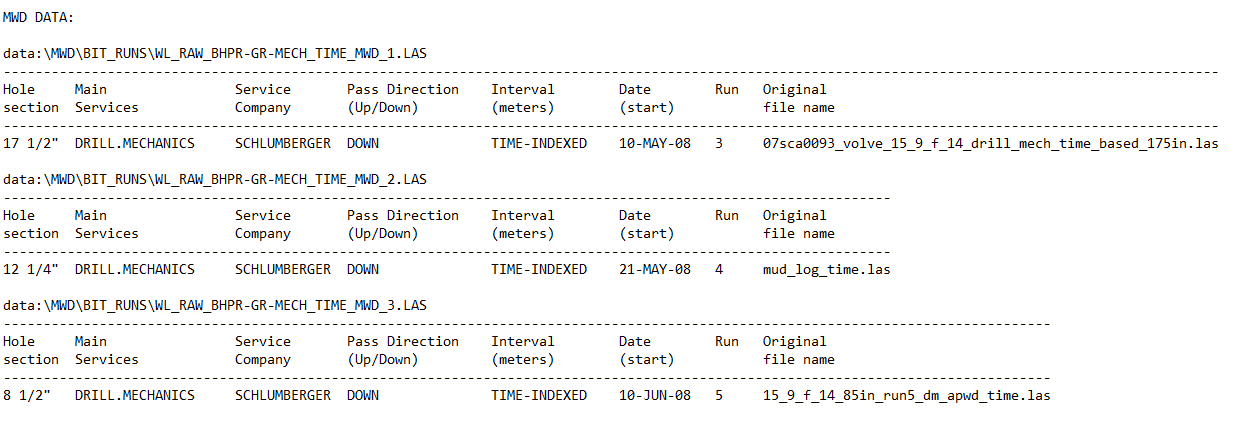
## Welly library import

In [58]:
import welly
print("Welly version: ", welly.__version__)

Welly version:  0.4.8


In [60]:
t1 = welly.Well.from_las("raw_data/WL_RAW_BHPR-GR-MECH_TIME_MWD_1.LAS", index="existing")

/home/vagrant/.pyenv/versions/anaconda3-2020.07/lib/python3.8/site-packages/lasio/las.py:276: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  arr[arr == provisional_null] = np.nan


UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U9'), dtype('<U9')) -> dtype('<U9')

In [61]:
from welly import Well
w = Well.from_las('raw_data/WL_RAW_BHPR-GR-MECH_TIME_MWD_1.LAS')

/home/vagrant/.pyenv/versions/anaconda3-2020.07/lib/python3.8/site-packages/welly/well.py:192: FutureWarning: From v0.5 the default will be 'original', keeping whatever is used in the LAS file. If you want to force conversion to metres, change your code to use `index='m'`.
  warnings.warn(m, FutureWarning)


LASUnknownUnitError: Unit of depth index not known

## To analyze this logs, intermediate procedure must be done also further analysis and research is needed